In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from statsmodels.tsa.vector_ar.vecm import coint_johansen

## Helper functions

In [2]:
def time_plotter(data, title=None, ax=None):
    fig = data.plot(figsize=(16, 5), title=title, ax=ax)
    fig.minorticks_on()
    fig.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
    fig.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)

## Mean reverting strategy

In [3]:
train_data = pd.read_pickle("train_data.pkl")
train_data.head()

sym,avtusd,btceur,btcusd,btgbtc,btgusd,datbtc,datusd,dshbtc,dshusd,edobtc,...,sanbtc,saneth,sanusd,xmrbtc,xmrusd,xrpbtc,xrpusd,yywusd,zecbtc,zecusd
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01,4.3501,11133.000000,13376.0,0.017510,233.91,0.000016,0.21599,0.075880,1018.4,0.000315,...,0.000407,0.007218,5.4528,0.025201,337.35,0.000152,2.0395,0.29672,0.038430,513.51
2018-01-02,4.8223,12190.000000,14722.0,0.017272,253.45,0.000016,0.23990,0.078710,1162.9,0.000296,...,0.000426,0.007499,6.3281,0.024751,364.23,0.000149,2.1930,0.32414,0.037153,547.88
2018-01-03,4.9444,12611.930380,15150.0,0.016210,245.63,0.000021,0.31060,0.074679,1131.4,0.000318,...,0.000437,0.007047,6.6440,0.025456,386.00,0.000180,2.7317,0.40344,0.037096,559.70
2018-01-04,4.5806,12553.152741,15159.0,0.015500,234.33,0.000020,0.30030,0.073563,1118.0,0.000340,...,0.000447,0.007583,7.1570,0.024498,372.50,0.000181,2.7367,0.40173,0.035959,545.11
2018-01-05,4.7399,14061.196800,16911.0,0.013692,232.08,0.000016,0.27160,0.063586,1079.8,0.000300,...,0.000433,0.007658,7.3922,0.021088,357.62,0.000147,2.4961,0.50470,0.031951,541.98


In [4]:
mr_pairs = pd.read_pickle("mean_reverting_pairs.pkl")
mr_pairs.head()

,sym1,sym2,pvalue
104,btgusd,ethusd,0.0
103,btgusd,xmrusd,0.0
100,btgusd,etcusd,0.0
105,btgusd,ltcusd,0.0
96,qtmusd,ethusd,0.0


## Finding the optimal ratio

In [5]:
hratios = []

for i, row in tqdm(list(mr_pairs.iterrows())):
    syms = list(row[["sym1", "sym2"]])
    test = coint_johansen(train_data[syms].dropna(), det_order=0, k_ar_diff=1)
    hratio = test.evec[:, 0]
    hratios.append(hratio)
    
mr_pairs["hratio"] = hratios

100%|█████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<00:00, 258.91it/s]


In [6]:
mr_pairs.head()

,sym1,sym2,pvalue,hratio
104,btgusd,ethusd,0.0,"[0.046955652162842004, -0.005909207286486495]"
103,btgusd,xmrusd,0.0,"[0.04459535710413538, -0.01634131625385791]"
100,btgusd,etcusd,0.0,"[0.03733968609519922, -0.11673349603827508]"
105,btgusd,ltcusd,0.0,"[0.03238266616972063, -0.013405791625567872]"
96,qtmusd,ethusd,0.0,"[0.300696518434622, -0.01092250787095261]"


## Forming the stationary spread time series 

In [7]:
test_data = pd.read_pickle("test_data.pkl")

In [8]:
test_data.head()

sym,avtusd,btceur,btcusd,btgbtc,btgusd,datbtc,datusd,dshbtc,dshusd,edobtc,...,sanbtc,saneth,sanusd,xmrbtc,xmrusd,xrpbtc,xrpusd,yywusd,zecbtc,zecusd
time,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,6429.721274,7212.700000,0.000741,5.3025,0.000002,0.013999,0.005806,41.845,0.000027,...,0.000029,0.001600,0.20300,0.006365,45.878,0.000027,0.19333,0.011362,0.003905,28.051
2020-01-02,0.0655,6256.800000,6989.400000,0.000725,5.1014,0.000002,0.012588,0.005733,40.152,0.000027,...,0.000026,0.001451,0.19578,0.006510,45.643,0.000027,0.18817,0.009701,0.003890,27.157
2020-01-03,NaN,6605.317587,7371.200000,0.000733,5.4152,0.000002,0.013616,0.005981,43.897,0.000026,...,NaN,0.001407,0.21550,0.006949,50.996,0.000026,0.19413,0.009504,0.003886,28.597
2020-01-04,NaN,6607.800000,7369.831761,0.000724,5.3854,0.000002,0.016580,0.006282,46.298,0.000027,...,0.000028,0.001506,0.18804,0.006830,50.520,0.000026,0.19352,0.010998,0.004073,29.937
2020-01-05,NaN,6598.193025,7364.600000,0.000734,5.4270,0.000002,0.015300,0.006952,51.190,0.000027,...,0.000029,NaN,0.19607,0.007300,53.633,0.000026,0.19468,0.009545,0.004171,30.741


In [9]:
spread = pd.DataFrame(test_data[["btgusd", "ethusd"]].values * mr_pairs["hratio"].iloc[0], index=test_data.index, columns=["btgusd", "ethusd"])
spread["spd"] = spread.sum(axis=1)
spread["rolling_mean"] = spread["spd"].rolling(30).mean()
spread["rolling_std"] = spread["spd"].rolling(30).std()
spread["zscore"] = (spread["spd"] - spread["rolling_mean"]) / spread["rolling_std"]

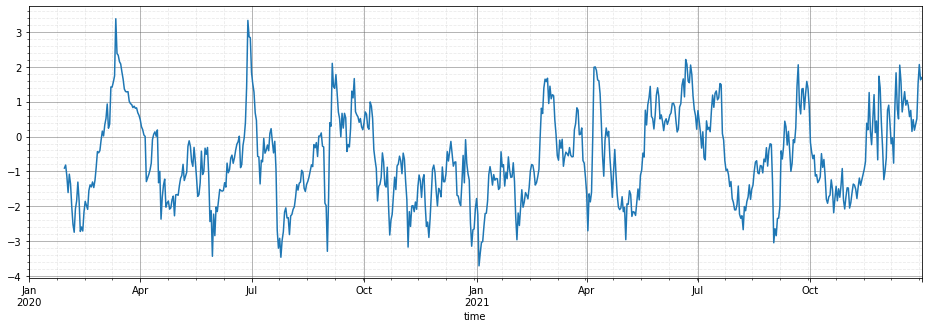

In [10]:
time_plotter(spread["zscore"])

In [11]:
spread["longpos"] = np.nan
spread["shortpos"] = np.nan

spread.loc[spread["zscore"]<=-2, "longpos"] = 1
spread.loc[spread["zscore"]>=0, "longpos"] = 0

spread.loc[spread["zscore"]>=2, "shortpos"] = -1
spread.loc[spread["zscore"]<=0, "shortpos"] = 0

spread["pos"] = spread["longpos"] + spread["shortpos"]
spread["pos"] = spread["pos"].fillna(0)

In [12]:
spread["change"] = spread["spd"].pct_change()
spread["ret"] = spread["pos"] * spread["change"]
spread["ret"] = spread["ret"].fillna(0)

In [13]:
spread["portret"] = spread["ret"].cumsum()

In [14]:
pair_rets = spread[["portret"]].copy(deep=True)
pair_rets["pair"] = "a_b"
pair_rets = pair_rets.set_index("pair", append=True)

In [15]:
pairs_port = []

for i, row in tqdm(list(mr_pairs.iterrows())):
    syms = list(row[["sym1", "sym2"]])
    
    spread = pd.DataFrame(test_data[syms].values * row["hratio"], index=test_data.index, columns=syms)
    spread["spd"] = spread.sum(axis=1)
    spread["rolling_mean"] = spread["spd"].rolling(30).mean()
    spread["rolling_std"] = spread["spd"].rolling(30).std()
    spread["zscore"] = (spread["spd"] - spread["rolling_mean"]) / spread["rolling_std"]

    spread["longpos"] = np.nan
    spread["shortpos"] = np.nan

    spread.loc[spread["zscore"]<=-2, "longpos"] = 1
    spread.loc[spread["zscore"]>=0, "longpos"] = 0

    spread.loc[spread["zscore"]>=2, "shortpos"] = -1
    spread.loc[spread["zscore"]<=0, "shortpos"] = 0

    spread["pos"] = spread["longpos"] + spread["shortpos"]
    spread["pos"] = spread["pos"].fillna(0)

    spread["change"] = spread["spd"].pct_change()
    spread["ret"] = spread["pos"] * spread["change"]
    spread["ret"] = spread["ret"].fillna(0)

    spread["portret"] = spread["ret"].cumsum()
    
    pair_ret = spread[["portret"]].copy(deep=True)
    pair_ret["pair"] = f"{row['sym1']}_{row['sym2']}"
    pair_ret = pair_ret.set_index("pair", append=True)
    pair_ret
    
    pairs_port.append(pair_ret)

100%|██████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<00:00, 91.90it/s]


In [16]:
basket = pd.concat(pairs_port).unstack("pair")["portret"]
basket.tail()

pair,btgusd_etcusd,btgusd_ethusd,btgusd_ltcusd,btgusd_neousd,btgusd_omgusd,btgusd_xmrusd,btgusd_zecusd,dshusd_ethusd,dshusd_ltcusd,dshusd_omgusd,...,xrpusd_ethusd,xrpusd_ioteur,xrpusd_iotusd,xrpusd_ltcusd,xrpusd_omgusd,xrpusd_xmrusd,zecusd_ethusd,zecusd_ltcusd,zecusd_omgusd,zecusd_xmrusd
time,,,,,,,,,,,,,,,,,,,,,
2021-12-27,11.034308,6.150120,10.608175,110.072824,19.726023,8.566829,7.805443,8.041593,-145.755301,-15.267111,...,-605.466449,-10.046439,-9.847517,-11.612311,-11.74729,-5.767696,6.377879,-6.0701,-29.496337,6.586693
2021-12-28,11.034308,6.150120,10.608175,110.072824,19.726023,8.566829,7.805443,8.041593,-145.755301,-15.267111,...,-605.466449,-10.200421,-9.847517,-11.612311,-11.74729,-5.767696,6.377879,-6.0701,-29.496337,6.590032
2021-12-29,11.034308,6.194768,10.608175,110.072824,19.726023,8.663423,7.805443,8.087242,-145.755301,-15.267111,...,-605.466449,-10.313509,-9.957022,-11.612311,-11.74729,-5.767696,6.423633,-6.0701,-29.496337,6.649347
2021-12-30,11.034308,6.194768,10.608175,110.072824,19.726023,8.756387,7.805443,8.087242,-145.755301,-15.267111,...,-605.466449,-10.313509,-9.957022,-11.612311,-11.74729,-5.767696,6.423633,-6.0701,-29.496337,6.701261
2021-12-31,11.034308,6.194768,10.608175,110.072824,19.726023,8.803027,7.805443,8.087242,-145.755301,-15.267111,...,-605.466449,-10.313509,-9.957022,-11.612311,-11.74729,-5.767696,6.423633,-6.0701,-29.496337,6.755553


In [17]:
terminal_wealth = basket.iloc[-1, :]

In [18]:
terminal_wealth[abs(terminal_wealth) > 20].size

17

In [19]:
keep_wealth = terminal_wealth[abs(terminal_wealth) <= 20]

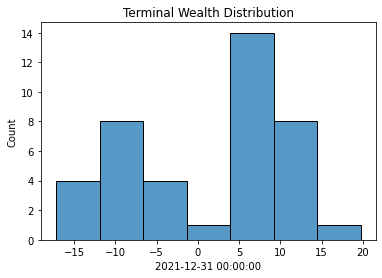

In [20]:
sns.histplot(keep_wealth).set_title("Terminal Wealth Distribution");

In [21]:
keep_wealth.mean()

1.2965735407658925